In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
basic_path = os.getcwd()
train_path = basic_path+'\\Train'
test_path = basic_path+'\\Test'

In [3]:
train_path

'C:\\Users\\ILLUMINATI\\Desktop\\GestureToWords\\Gesture Image Pre-Processed Data\\Train'

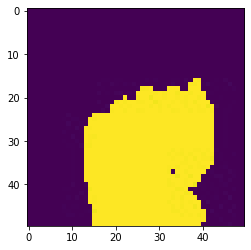

In [6]:
img = plt.imread(train_path+'\\A\\6.jpg')
plt.imshow(img)

In [7]:
img.shape

(50, 50)

In [8]:
image_shape = (50,50,3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
img_gen=ImageDataGenerator(rescale = 1/255,rotation_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                           shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [11]:
img_gen.flow_from_directory(train_path)

Found 55315 images belonging to 37 classes.


In [12]:
img_gen.flow_from_directory(test_path)

Found 185 images belonging to 37 classes.


In [13]:
batch_size = 32

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(37,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
train_gen = img_gen.flow_from_directory(train_path,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=batch_size)

Found 55315 images belonging to 37 classes.


In [17]:
test_gen = img_gen.flow_from_directory(test_path,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                      shuffle=True)

Found 185 images belonging to 37 classes.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [20]:
model.fit_generator(train_gen,epochs=20,validation_data=test_gen,callbacks=[early_stop])

Epoch 1/20
1729/1729 [==============================] - 225s 130ms/step - loss: 0.3309 - accuracy: 0.8972 - val_loss: 0.2378 - val_accuracy: 0.9405
Epoch 2/20
1729/1729 [==============================] - 227s 131ms/step - loss: 0.0595 - accuracy: 0.9809 - val_loss: 0.0973 - val_accuracy: 0.9622
Epoch 3/20
1729/1729 [==============================] - 242s 140ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.1900 - val_accuracy: 0.9459
Epoch 4/20
1729/1729 [==============================] - 268s 155ms/step - loss: 0.0290 - accuracy: 0.9918 - val_loss: 0.1488 - val_accuracy: 0.9568
Epoch 5/20
1729/1729 [==============================] - 228s 132ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0445 - val_accuracy: 0.9784
Epoch 6/20
1729/1729 [==============================] - 223s 129ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.0709 - val_accuracy: 0.9784
Epoch 7/20
1729/1729 [==============================] - 219s 127ms/step - loss: 0.0182 - accuracy: 0.9948 - val_

In [21]:
model_df = pd.DataFrame(model.history.history)

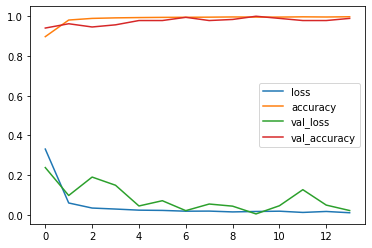

In [22]:
model_df.plot()

In [23]:
model.evaluate_generator(test_gen)

[0.0011539403215768591, 1.0]

In [24]:
predictions = model.predict_generator(test_gen)

In [25]:
predictions

array([[1.05785564e-15, 1.32373239e-25, 4.29653755e-30, ...,
        1.36040498e-20, 1.14045265e-20, 5.12673098e-11],
       [3.35847862e-35, 7.44952091e-27, 8.49910141e-24, ...,
        5.29877777e-31, 1.75720327e-17, 5.99571081e-26],
       [1.14061733e-12, 8.06029831e-13, 1.70258165e-15, ...,
        1.08007170e-19, 9.99999285e-01, 1.02942421e-13],
       ...,
       [2.13072209e-08, 3.07848913e-10, 6.29774401e-12, ...,
        1.41127643e-08, 1.20427404e-13, 1.36685953e-12],
       [2.64302978e-26, 2.36813810e-27, 1.76256550e-34, ...,
        3.26656685e-41, 4.71474218e-36, 2.53870763e-24],
       [1.61510772e-28, 1.67551167e-27, 3.01343165e-25, ...,
        1.84480276e-32, 4.64390212e-26, 6.06447503e-38]], dtype=float32)

In [26]:
from sklearn.metrics import classification_report

In [29]:
# print(classification_report(test_gen.classes,predictions))

In [27]:
test_gen.classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36])

In [30]:
test_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 '_': 36}

In [55]:
test_image = cv2.imread("C://Users//ILLUMINATI//Desktop//GestureToWords//Gesture Image Pre-Processed Data//Test//C//3.jpg")

In [56]:
type(test_image)#check if path is correct

numpy.ndarray

In [57]:
test_image = np.asarray(test_image,dtype=np.float32)

In [58]:
test_image = np.expand_dims(test_image,axis=0)

In [59]:
test_image.shape

(1, 50, 50, 3)

In [60]:
pred = model.predict(test_image)
np.argmax(pred)

12

In [61]:
model.save('gesture-word-model.h5')